### Load Colab Notebook settings

**Link Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/MLCLELIE/CLELIE/'  #change dir to your project folder


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:

import sys
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
sys.path.append(root_path)
from constants import *
from data_preprocess import *
from data_postprocess import *
from fit_model import *
import os
import sys
from unet import *

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


**Try GPU power**

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.4 GB  | Proc size: 627.2 MB
GPU RAM Free: 16015MB | Used: 265MB | Util   2% | Total 16280MB


In [0]:

#!kill -9 -1

In [0]:
def dataset_augmentation(directory_from, directory_to): 
    if not os.path.exists(directory_to):
        os.mkdir(directory_to)
    datagen = ImageDataGenerator()
    filenames = os.listdir(directory_from)
    #create 24 rotated images for one image
    angle = 45
    zoom = 0.75
    imgs = []
    
    for i, fileNb in enumerate(filenames):
        if fileNb != ".DS_Store":
            full_name = directory_from+fileNb
            img=mpimg.imread(full_name)
            io.imsave(directory_to+fileNb, img)
            img_asarray = img_to_array(img)

            out = datagen.apply_transform(x=img_asarray, transform_parameters={'theta':angle, 'zx':zoom, 'zy':zoom})
            j = 101+i
            fileNb2 = "satImage_%03d"%j + ".png"
            io.imsave(directory_to+fileNb2, out)
            sys.stdout.write("\rImage {}/{} is being loaded".format(i+1,len(filenames)))
            sys.stdout.flush()

In [9]:
dataset_augmentation(root_path+"data/train/images/", root_path+"data/train/img_aug/")
dataset_augmentation(root_path+"data/train/groundtruth/", root_path+"data/train/gts_aug/")


Image 1/100 is being loaded

Image 2/100 is being loaded

Image 3/100 is being loaded

Image 4/100 is being loaded

Image 5/100 is being loaded

Image 6/100 is being loaded

Image 7/100 is being loaded

Image 8/100 is being loaded

Image 9/100 is being loaded

Image 10/100 is being loaded

Image 11/100 is being loaded

Image 12/100 is being loaded

Image 13/100 is being loaded

Image 14/100 is being loaded

Image 15/100 is being loaded

Image 16/100 is being loaded

Image 17/100 is being loaded

Image 18/100 is being loaded

Image 19/100 is being loaded

Image 20/100 is being loaded

Image 21/100 is being loaded

Image 22/100 is being loaded

Image 23/100 is being loaded

Image 24/100 is being loaded

Image 25/100 is being loaded

Image 26/100 is being loaded

Image 27/100 is being loaded

Image 28/100 is being loaded

Image 29/100 is being loaded

Image 30/100 is being loaded

Image 31/100 is being loaded

Image 32/100 is being loaded

Image 33/100 is being loaded

Image 34/100 is being loaded

Image 35/100 is being loaded

Image 36/100 is being loaded

Image 37/100 is being loaded

Image 38/100 is being loaded

Image 39/100 is being loaded

Image 40/100 is being loaded

Image 41/100 is being loaded

Image 42/100 is being loaded

Image 43/100 is being loaded

Image 44/100 is being loaded

Image 45/100 is being loaded

Image 46/100 is being loaded

Image 47/100 is being loaded

Image 48/100 is being loaded

Image 49/100 is being loaded

Image 50/100 is being loaded

Image 51/100 is being loaded

Image 52/100 is being loaded

Image 53/100 is being loaded

Image 54/100 is being loaded

Image 55/100 is being loaded

Image 56/100 is being loaded

Image 57/100 is being loaded

Image 58/100 is being loaded

Image 59/100 is being loaded

Image 60/100 is being loaded

Image 61/100 is being loaded

Image 62/100 is being loaded

Image 63/100 is being loaded

Image 64/100 is being loaded

Image 65/100 is being loaded

Image 66/100 is being loaded

Image 67/100 is being loaded

Image 68/100 is being loaded

Image 69/100 is being loaded

Image 70/100 is being loaded

Image 71/100 is being loaded

Image 72/100 is being loaded

Image 73/100 is being loaded

Image 74/100 is being loaded

Image 75/100 is being loaded

Image 76/100 is being loaded

Image 77/100 is being loaded

Image 78/100 is being loaded

Image 79/100 is being loaded

Image 80/100 is being loaded

Image 81/100 is being loaded

Image 82/100 is being loaded

Image 83/100 is being loaded

Image 84/100 is being loaded

Image 85/100 is being loaded

Image 86/100 is being loaded

Image 87/100 is being loaded

Image 88/100 is being loaded

Image 89/100 is being loaded

Image 90/100 is being loaded

Image 91/100 is being loaded

Image 92/100 is being loaded

Image 93/100 is being loaded

Image 94/100 is being loaded

Image 95/100 is being loaded

Image 96/100 is being loaded

Image 97/100 is being loaded

Image 98/100 is being loaded

Image 99/100 is being loaded

Image 100/100 is being loaded

Image 1/100 is being loaded

Image 2/100 is being loaded

Image 3/100 is being loaded

Image 4/100 is being loaded

Image 5/100 is being loaded

Image 6/100 is being loaded

Image 7/100 is being loaded

Image 8/100 is being loaded

Image 9/100 is being loaded

Image 10/100 is being loaded

Image 11/100 is being loaded

Image 12/100 is being loaded

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: gdrive/My Drive/MLCLELIE/CLELIE/data/train/gts_aug/satImage_092.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: gdrive/My Drive/MLCLELIE/CLELIE/data/train/gts_aug/satImage_113.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image 13/100 is being loaded

Image 14/100 is being loaded

Image 15/100 is being loaded

Image 16/100 is being loaded

Image 17/100 is being loaded

Image 18/100 is being loaded

Image 19/100 is being loaded

Image 20/100 is being loaded

Image 21/100 is being loaded

Image 22/100 is being loaded

Image 23/100 is being loaded

Image 24/100 is being loaded

Image 25/100 is being loaded

Image 26/100 is being loaded

Image 27/100 is being loaded

Image 28/100 is being loaded

Image 29/100 is being loaded

Image 30/100 is being loaded

Image 31/100 is being loaded

Image 32/100 is being loaded

Image 33/100 is being loaded

Image 34/100 is being loaded

Image 35/100 is being loaded

Image 36/100 is being loaded

Image 37/100 is being loaded

Image 38/100 is being loaded

Image 39/100 is being loaded

Image 40/100 is being loaded

Image 41/100 is being loaded

Image 42/100 is being loaded

Image 43/100 is being loaded

Image 44/100 is being loaded

Image 45/100 is being loaded

Image 46/100 is being loaded

Image 47/100 is being loaded

Image 48/100 is being loaded

Image 49/100 is being loaded

Image 50/100 is being loaded

Image 51/100 is being loaded

Image 52/100 is being loaded

Image 53/100 is being loaded

Image 54/100 is being loaded

Image 55/100 is being loaded

Image 56/100 is being loaded

Image 57/100 is being loaded

Image 58/100 is being loaded

Image 59/100 is being loaded

Image 60/100 is being loaded

Image 61/100 is being loaded

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: gdrive/My Drive/MLCLELIE/CLELIE/data/train/gts_aug/satImage_162.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image 62/100 is being loaded

Image 63/100 is being loaded

Image 64/100 is being loaded

Image 65/100 is being loaded

Image 66/100 is being loaded

Image 67/100 is being loaded

Image 68/100 is being loaded

Image 69/100 is being loaded

Image 70/100 is being loaded

Image 71/100 is being loaded

Image 72/100 is being loaded

Image 73/100 is being loaded

Image 74/100 is being loaded

Image 75/100 is being loaded

Image 76/100 is being loaded

Image 77/100 is being loaded

Image 78/100 is being loaded

Image 79/100 is being loaded

Image 80/100 is being loaded

Image 81/100 is being loaded

Image 82/100 is being loaded

Image 83/100 is being loaded

Image 84/100 is being loaded

Image 85/100 is being loaded

Image 86/100 is being loaded

Image 87/100 is being loaded

Image 88/100 is being loaded

Image 89/100 is being loaded

Image 90/100 is being loaded

Image 91/100 is being loaded

Image 92/100 is being loaded

Image 93/100 is being loaded

Image 94/100 is being loaded

Image 95/100 is being loaded

Image 96/100 is being loaded

Image 97/100 is being loaded

Image 98/100 is being loaded

Image 99/100 is being loaded

Image 100/100 is being loaded

In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger

# --- Indicate the path of the pretrained model (if it exists) and the images to load
#WEIGHT_PATH     =  # A remplir
DATA_PATH       = root_path+"data/"
DATA_TEST_PATH  = root_path+"data/test/"
MODEL_PATH      = root_path+"models/"
PRED_PATH       = DATA_PATH+"predictions/"

SIDE = 256
SIDE_FINAL = 608
PATCH_SIZE = 16
TRESHOLD = 0.2
K_FOLD = 5

In [8]:
# --- Cross validation step by step


rotation_angles = [5,90]

k=0
    
# Creates a list to store the predictions 
IMGS = []

# Create the k folds
create_validation_train_directory(DATA_PATH+'train/', 'img_aug', 'gts_aug', k, 1)

print("create k folds: done")

40
160
34
138
create k folds: done


In [9]:
#for i in rotation_angles:
i = rotation_angles[0]
# --- Train or load a pretrained model
MODEL_NAME = f'Model_k{k}_rot{i}'
model = fit_unet(i, MODEL_PATH, MODEL_NAME)
print('fit model: done')
# Save the trained model
#if not os.path.exists(MODEL_PATH):
#      os.mkdir(MODEL_PATH)



















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



KeyboardInterrupt: ignored

In [0]:
#save_model(model, MODEL_PATH, MODEL_NAME)
model = unet256(input_size=(SIDE, SIDE,3), verbose=False)
model.load_weights('gdrive/My Drive/MLCLELIE/CLELIE/models/Model_k0_rot5.hdf5')

In [13]:
    # --- Load the testing set
    data_test = data_load(DATA_PATH+'test_resized/')
    print("load dataset: done")

    # --- Predict the the segmentation of the testing images
    # Reshape the images to 256x256 px and predict the segmentation
    reshape_img(DATA_PATH+"test/", DATA_PATH+"test_resized/", SIDE)
    results = model.predict(data_test,verbose=1)
    print("reshaped: done")

    # Create a prediction folder if it doesn't exist
    if not os.path.exists(PRED_PATH):
            os.mkdir(PRED_PATH)

  


Image 50/50 is being loaded
load dataset: done
50/50 [==============================] - 6s 122ms/step
reshaped: done


In [15]:
  # Save the predictions
  PRED_FILE = PRED_PATH + f'Model_k{k}_rot{i}/'
  savePredictedImages(DATA_PATH+"test_resized/", 
                      PRED_FILE, 
                      results, 
                      concat=False)
  print("pred: done")

  # Resize the prediction to their final size (608x608 px)
  reshape_img(PRED_FILE, PRED_FILE, SIDE_FINAL)
  print("yolo")


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


save pred ok
pred: done
yolo


In [30]:
  IMGS = []
  kfold = range(0,5)
  rot = [5,90]
for k in kfold:
    for i in rot:
        PRED_FILE = PRED_PATH + f'Model_k1_rot{i}/'
        # Add the reshaped prediction to the prediction list
        IMGS.append((1,data_load_for_prediction(PRED_FILE)))

Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded
Image 50/50 is being loaded


In [31]:
means = average_image(IMGS)

Size should be (50, 608, 608) and currently is: (50, 608, 608)


In [0]:
import matplotlib.pyplot as plt

In [33]:
original_data = data_load_for_prediction(DATA_PATH+"test/", RGB_image=True)
patched_imgs, vs = patched_imgs_and_vs(means)

Image 50/50 is being loaded
Image 50/50 is being processed

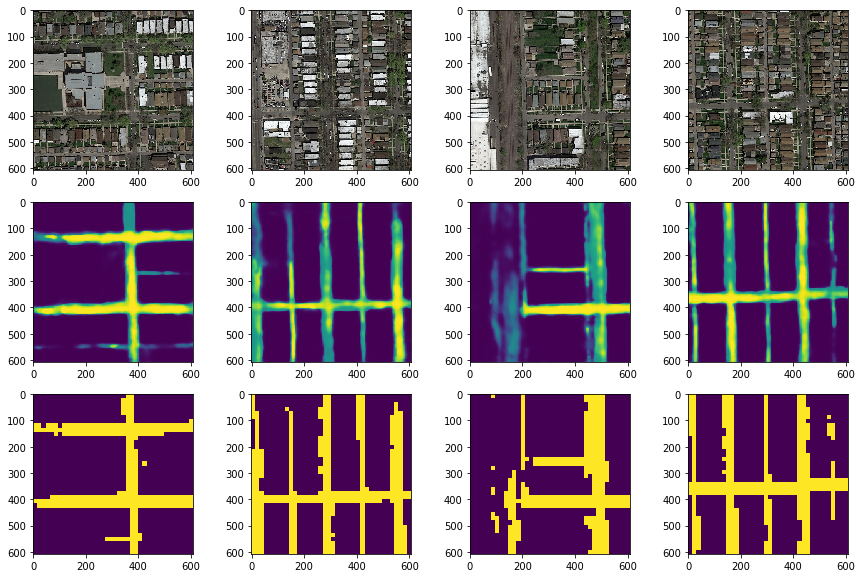

In [34]:
fig=plt.figure(figsize=(15, 10))
index_img = 40
columns = 4
rows = 3
img_to_plot0 = means[index_img:index_img+4]
img_to_plot1 =np.append(img_to_plot0, patched_imgs[index_img:index_img+4], axis=0)
for i in range(1, columns*rows +1):
    if(i<=4):
        img = original_data[index_img+i-1]
    else:
        img = img_to_plot1[i-5]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [0]:
if not os.path.exists(root_path+"submissions/"):
        os.mkdir(root_path+"submissions/")
create_csv_submission(patched_imgs, vs, root_path+'submissions/sub1' )